<a href="https://colab.research.google.com/github/dfukagaw28/ColabNotebooks/blob/main/Colab%E3%81%A7NDL%E5%8F%A4%E5%85%B8%E7%B1%8DOCR_lite%E3%82%92%E8%A9%A6%E3%81%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ColabでNDL古典籍OCR-liteを試す

*   [NDL古典籍OCR-Liteの公開について](https://lab.ndl.go.jp/news/2024/2024-11-26/)
*   [NDL古典籍OCR-Liteアプリケーションのリポジトリ](https://github.com/ndl-lab/ndlkotenocr-lite)
*   colab で pillow をインストール（or アップデート）するとセッションの再起動が必要となるらしいので回避する
*   他のパッケージも，バージョンを緩やかに指定する（追加のインストールをできるだけ避けるように）
    *   今後 Colab の仕様変更やパッケージの更新によって状況は変わり得るので参考程度に

In [1]:
!pip list | grep -i pillow

pillow                                11.2.1


In [2]:
%%writefile requirement.txt
coloredlogs==15.0.1
flet==0.28.3
humanfriendly==10.0
onnxruntime==1.22.0
ordered-set==4.1.0
repath==0.9.0
reportlab==4.4.1

Writing requirement.txt


In [3]:
!pip install -r requirement.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.0/463.0 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.4 MB/s eta 0:00:00


In [4]:
#@title 準備

DATADIR = "/content/data"
NUM_IMAGES = 5

# 画像データを取得する
!mkdir -p {DATADIR}/竜宮苦界玉手箱_3巻_9892834_0001
%cd {DATADIR}/竜宮苦界玉手箱_3巻_9892834_0001
for index in range(1, NUM_IMAGES + 1):
    url = f"https://dl.ndl.go.jp/api/iiif/9892834/R{index:07}/full/full/0/default.jpg"
    filename = f'{index:04}_0000.jpg'
    !curl -sRL {url} -o {filename}

# NDL古典籍OCR-lite のコードを取得する
%cd /content
!git clone https://github.com/ndl-lab/ndlkotenocr-lite

/content/data/竜宮苦界玉手箱_3巻_9892834_0001
/content
Cloning into 'ndlkotenocr-lite'...
remote: Enumerating objects: 287, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 287 (delta 8), reused 4 (delta 4), pack-reused 270 (from 2)
Receiving objects: 100% (287/287), 112.33 MiB | 30.28 MiB/s, done.
Resolving deltas: 100% (118/118), done.


In [5]:
#@title 実行

%cd /content/ndlkotenocr-lite/src
!mkdir -p {DATADIR}/tmpdir
!python ocr.py --sourcedir {DATADIR}/竜宮苦界玉手箱_3巻_9892834_0001 --output {DATADIR}/tmpdir --viz True

/content/ndlkotenocr-lite/src
['/content/data/竜宮苦界玉手箱_3巻_9892834_0001/0002_0000.jpg', '/content/data/竜宮苦界玉手箱_3巻_9892834_0001/0001_0000.jpg', '/content/data/竜宮苦界玉手箱_3巻_9892834_0001/0003_0000.jpg', '/content/data/竜宮苦界玉手箱_3巻_9892834_0001/0005_0000.jpg', '/content/data/竜宮苦界玉手箱_3巻_9892834_0001/0004_0000.jpg']
[INFO] Intialize Model
[INFO] Inference Image
[INFO] Saving result on /content/data/tmpdir/viz_0002_0000.jpg
[INFO] Intialize Model
[INFO] Inference Image
[INFO] Saving result on /content/data/tmpdir/viz_0001_0000.jpg
[INFO] Intialize Model
[INFO] Inference Image
[INFO] Saving result on /content/data/tmpdir/viz_0003_0000.jpg
[INFO] Intialize Model
[INFO] Inference Image
[INFO] Saving result on /content/data/tmpdir/viz_0005_0000.jpg
[INFO] Intialize Model
[INFO] Inference Image
[INFO] Saving result on /content/data/tmpdir/viz_0004_0000.jpg


======== 0001_0000.jpg ========


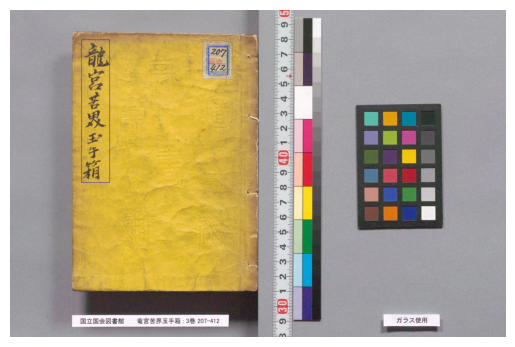

かし
龍宮苦界玉手箱

======== 0002_0000.jpg ========


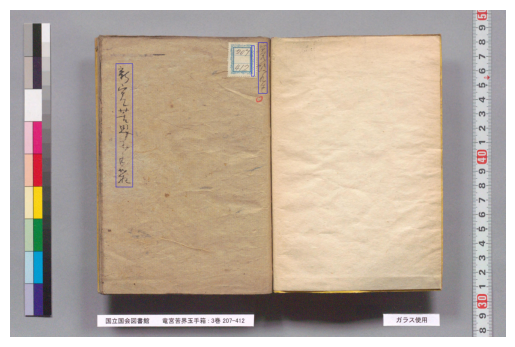

実光政九戸
□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□
新定芝居思召候由御

======== 0003_0000.jpg ========


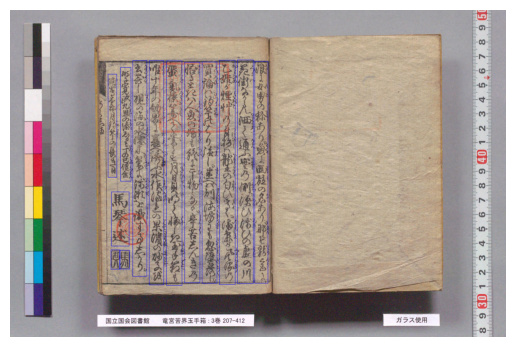

浪に女男の称あり。魚に西施の名あり。耶ぞ龍宮に。
花街なからん。洒て通ふ寒の渕。深ひ漂ひの虚の川
乙姫が煙草の付指は龍王の匂ひ高く。浦島が。其湯の
買論は。釣竿のはり強し。迷へば則海坊主も忽堕落し。
悟るときは人魚の嬌も終に干物となる。辛苦しんきの
蜃気楼。算へて暮らす月日貝明て悔しき玉手箱も
唯十年の劬界に衰へ誘ふ。水俟流れの果消の砂子を
書寄し硯の海の水澪木。筆に浅瀬を識す事しかり。
時に寛政九界の湊しるも丁の巳価金
浦嶋太郎月釣竿の長き日
馬琴述
丁
十七月

======== 0004_0000.jpg ========


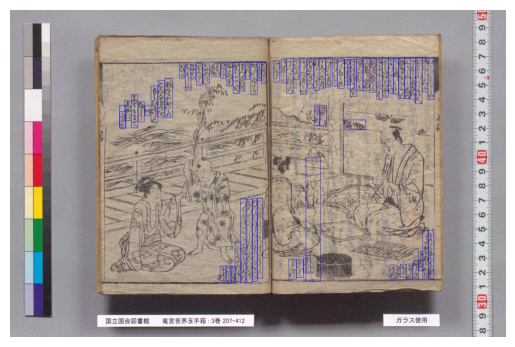

むかし〳〵三うらや
嶋太郎といふ
かれがいゑなの
三うらやと名の
嶋太郎を一つにして
うら嶋〳〵と
よひけるが此
うら嶋ずいぶん
きようものにて
おとこありよの人
何をさせても
くもかねぬ
男なれとも
かんじんのうんと
かんらんのこん
いふものが
つたなく只
ぶら〳〵と
およし
くらしけるが
ころは六月
朔日の事にて
あさくさの
ふじへさんけいし
さいわい
嶋太郎が
まつさきには
□□□□□□□
□□□□□□□□□□□□□□□□□□□□□□□□□□□□□
おば有て
てんがく
みせを
出してゐたり
ければ
まつさきの
おばがかたへ
おとづれ
せう
ばい
なめしに
でんがく
にて
ちそうに
なる
〽あねヱやおいらは
こんなものを
もらひました
松
などゝ
しやれ
子どもまで
たがる
〽てんがくなんぞ大しよ
くの心をしらんと
申せば
おじき
なしに
くだ
ます
□□□□□□□□□□□□□□□□□□□□
もつと
かへて
まいれ
〽この日ざかりにかへらずとうらの
川ばたてゆるりとすゞみ夕かたに
なつてかへらしやれたいくつなら
つりさほを御し一ませう此ころの
にこりてはよく
うなぎ
がかゝる
そう

======== 0005_0000.jpg ========


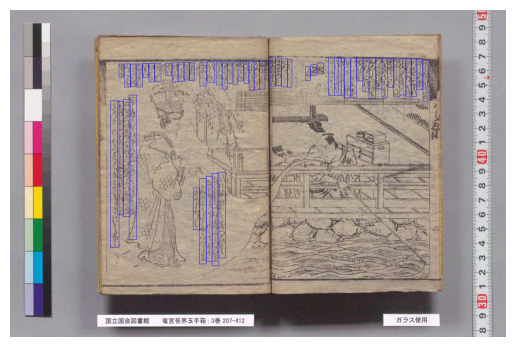

うら嶋は川ばたの
ざしきへ出て
川かぜにふかれ
ければ道〳〵の
あつさをとり
かへし水へんの
じゆうさは
つりさほを
いゑのうちから
おろしてつりも
されるこれは
めづらしい
□よりのちそう
なりとよねんを
なくたのしみ
かけしがしほ
ときがわるひ
□□□□□□□□□□□□□□□□□□□□□□□□□□□□□
ちに
□□□□□□□□
もちなから
とろ〳〵と
まどろみし
ゆめの中に
おくりものゝ
かめこつぜん
とあらはれ
かのうら
しまを
かうらら
のせて
りうぐうへ
つれゆく
〽うらず
ゆめ心に
ものゝ
あめに
つれて
行かれは
ては
〽これは楚国のみかどのつかひでも
なくそこつのむしんのふみつかひでは
なをなしさとしのこうより
かめのこうだはやくいつしよに
きのじや〳〵
二かくも
つたま
ずは
なるまひ
とさき
くゞりを
する
〽うら嶋がむかひならは只のかめでもよたそうな
所をたいのものゝかめとひねつたはしんてな
しゆこうであろうとうらしませうち〳〵と
うなつきかのかめにつれだちなみまをかきわけいそきゆく



In [7]:
#@title 結果を確認する

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for index in range(1, NUM_IMAGES + 1):
    name = f"{index:04}_0000"

    print(f'======== {name}.jpg ========')

    path = f"{DATADIR}/tmpdir/viz_{name}.jpg"
    img = mpimg.imread(path)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

    text = open(f'{DATADIR}/tmpdir/{name}.txt').read()
    print(text)
    print()